In [1]:
%run notebook_setup.py

sys.path.append('../..')

In [2]:
from standardiser import standardise

In [3]:
standardise.logger.setLevel('DEBUG')

# `standardise`: get standardised parent

### Introduction

This document provides some examples of the use of the **`standardise`** module, which uses the component modules described in the previous documents.

### Examples

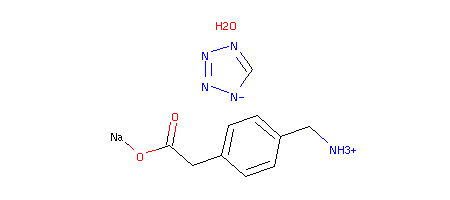

In [4]:
mol = Chem.MolFromSmiles("[Na]OC(=O)Cc1ccc(C[NH3+])cc1.c1nnn[n-]1.O")

mol

[2016/May/13 08:16:41 DEBUG   ] Starting fragment 1 '[Na+]'...
[2016/May/13 08:16:41 DEBUG   ] 1) Check for non-organic elements...
[2016/May/13 08:16:41 DEBUG   ] Starting fragment 2 '[NH3+]Cc1ccc(CC(=O)[O-])cc1'...
[2016/May/13 08:16:41 DEBUG   ] 1) Check for non-organic elements...
[2016/May/13 08:16:41 DEBUG   ] 2) Attempting to neutralise (first pass)...
[2016/May/13 08:16:41 DEBUG   ] 3) Applying rules...
[2016/May/13 08:16:41 DEBUG   ] 4) Attempting to neutralise (second pass)...
[2016/May/13 08:16:41 DEBUG   ] 5) Checking if frag is a salt/solvate...
[2016/May/13 08:16:41 DEBUG   ] ...fragment kept.
[2016/May/13 08:16:41 DEBUG   ] Starting fragment 3 'c1nnn[n-]1'...
[2016/May/13 08:16:41 DEBUG   ] 1) Check for non-organic elements...
[2016/May/13 08:16:41 DEBUG   ] 2) Attempting to neutralise (first pass)...
[2016/May/13 08:16:41 DEBUG   ] 3) Applying rules...
[2016/May/13 08:16:41 DEBUG   ] 4) Attempting to neutralise (second pass)...
[2016/May/13 08:16:41 DEBUG   ] 5) Checkin

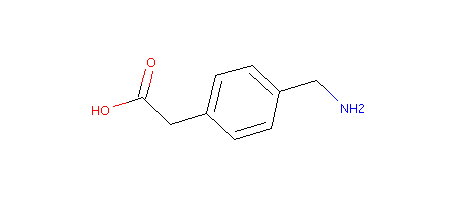

In [5]:
parent = None

try:
    
    parent = standardise.apply(mol)
    
except standardise.StandardiseException as e:
    
    logging.warn(e.message)
    
parent

### Multiple non-salt/solvate components

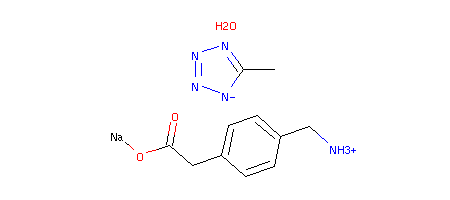

In [6]:
mol = Chem.MolFromSmiles("[Na]OC(=O)Cc1ccc(C[NH3+])cc1.Cc1nnn[n-]1.O")

mol

In [7]:
parent = None

try:
    
    parent = standardise.apply(mol)
    
except standardise.StandardiseException as e:
    
    logging.warning(e.message)
    
parent

[2016/May/13 08:16:41 DEBUG   ] Starting fragment 1 '[Na+]'...
[2016/May/13 08:16:41 DEBUG   ] 1) Check for non-organic elements...
[2016/May/13 08:16:41 DEBUG   ] Starting fragment 2 '[NH3+]Cc1ccc(CC(=O)[O-])cc1'...
[2016/May/13 08:16:41 DEBUG   ] 1) Check for non-organic elements...
[2016/May/13 08:16:41 DEBUG   ] 2) Attempting to neutralise (first pass)...
[2016/May/13 08:16:41 DEBUG   ] 3) Applying rules...
[2016/May/13 08:16:41 DEBUG   ] 4) Attempting to neutralise (second pass)...
[2016/May/13 08:16:41 DEBUG   ] 5) Checking if frag is a salt/solvate...
[2016/May/13 08:16:41 DEBUG   ] ...fragment kept.
[2016/May/13 08:16:41 DEBUG   ] Starting fragment 3 'Cc1nnn[n-]1'...
[2016/May/13 08:16:41 DEBUG   ] 1) Check for non-organic elements...
[2016/May/13 08:16:41 DEBUG   ] 2) Attempting to neutralise (first pass)...
[2016/May/13 08:16:41 DEBUG   ] 3) Applying rules...
[2016/May/13 08:16:41 DEBUG   ] 4) Attempting to neutralise (second pass)...
[2016/May/13 08:16:41 DEBUG   ] 5) Checki

### No non-salt/solvate components

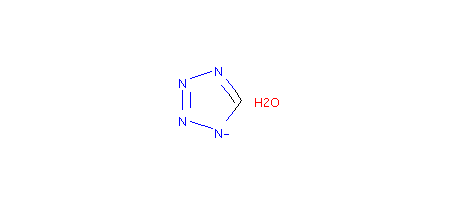

In [8]:
mol = Chem.MolFromSmiles("c1nnn[n-]1.O")

mol

In [9]:
parent = None

try:
    
    parent = standardise.apply(mol)
    
except standardise.StandardiseException as e:
    
    logging.warning(e.message)
    
parent

[2016/May/13 08:16:41 DEBUG   ] Starting fragment 1 'c1nnn[n-]1'...
[2016/May/13 08:16:41 DEBUG   ] 1) Check for non-organic elements...
[2016/May/13 08:16:41 DEBUG   ] 2) Attempting to neutralise (first pass)...
[2016/May/13 08:16:41 DEBUG   ] 3) Applying rules...
[2016/May/13 08:16:41 DEBUG   ] 4) Attempting to neutralise (second pass)...
[2016/May/13 08:16:41 DEBUG   ] 5) Checking if frag is a salt/solvate...
[2016/May/13 08:16:41 DEBUG   ] Starting fragment 2 'O'...
[2016/May/13 08:16:41 DEBUG   ] 1) Check for non-organic elements...
[2016/May/13 08:16:41 DEBUG   ] 2) Attempting to neutralise (first pass)...
[2016/May/13 08:16:41 DEBUG   ] 3) Applying rules...
[2016/May/13 08:16:41 DEBUG   ] 4) Attempting to neutralise (second pass)...
[2016/May/13 08:16:41 DEBUG   ] 5) Checking if frag is a salt/solvate...
[2016/May/13 08:16:41 WARNING ] No non-salt/solvate components
